In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from collections import defaultdict
import json

from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

In [2]:
curr_dir = !pwd
my_path = curr_dir[0]+"/hmm_domains/"
with open(my_path+'zinc_hmm_states_dict.pik', 'rb') as handle:
    states_dict = pickle.load(handle)

In [3]:
avg_af_dict = {}
avg_af_adj_dict = {}
for state in states_dict.keys():
    af_sum = 0
    af_adj_sum = 0
    for d in states_dict[state]:
        af_sum += d["af"]
        af_adj_sum += d["af_adj"]
    af_avg = af_sum/float(len(states_dict[state]))
    af_adj_avg = af_adj_sum/float(len(states_dict[state]))
    avg_af_dict[state] = af_avg
    avg_af_adj_dict[state] = af_adj_avg

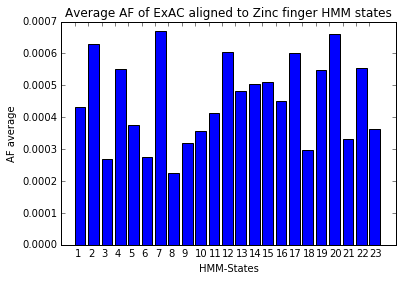

In [4]:
plt.bar(avg_af_dict.keys(), avg_af_dict.values())
plt.xticks(np.arange(1,24), avg_af_dict.keys(), ha='left')
plt.xlabel("HMM-States")
plt.ylabel("AF average")
plt.title("Average AF of ExAC aligned to Zinc finger HMM states")
plt.show()

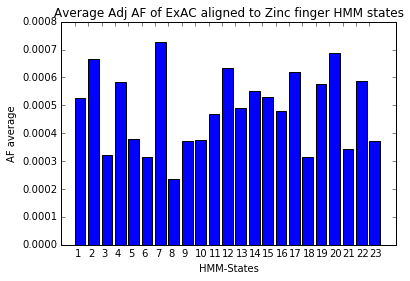

In [5]:
plt.bar(avg_af_adj_dict.keys(), avg_af_adj_dict.values())
plt.xticks(np.arange(1,24), avg_af_adj_dict.keys(), ha='left')
plt.xlabel("HMM-States")
plt.ylabel("AF average")
plt.title("Average Adj AF of ExAC aligned to Zinc finger HMM states")
plt.show()

In [6]:
states_af_dict = defaultdict(list)
for state in states_dict.keys():
    for d in states_dict[state]:
        states_af_dict[state].append(d["af"])

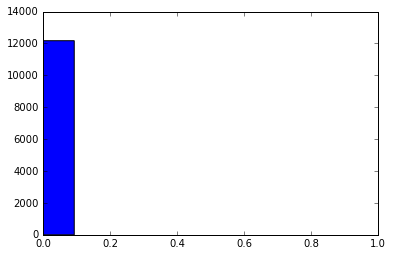

In [7]:
plt.hist(states_af_dict[12])
plt.show()

Installed pymed-0.2.0 from: https://github.com/garydoranjr/pyemd

In [9]:
from sklearn.metrics.pairwise import euclidean_distances
from pyemd import emd

emd_dict = {}
for state in states_af_dict.keys():
    first_signature = np.array(states_af_dict[state], dtype=float)
    second_signature = np.array([0] * len(states_af_dict[state]), dtype=float)
    distance_matrix = euclidean_distances(first_signature.reshape(-1, 1), second_signature.reshape(-1, 1))
    emd_dict[state] = emd(first_signature, second_signature, distance_matrix)

In [10]:
emd_dict

{1: 5.258372179002085,
 2: 7.616589902868067,
 3: 2.1636475780140287,
 4: 6.632987093720065,
 5: 3.3891589586920343,
 6: 2.9303677742500205,
 7: 8.08695700270798,
 8: 1.777071123450008,
 9: 3.7773614046080297,
 10: 4.337111139408035,
 11: 4.222734328472042,
 12: 6.860400151591067,
 13: 5.629526510751054,
 14: 6.066672183101052,
 15: 6.187986276575073,
 16: 5.438712322325064,
 17: 5.3210635057750375,
 18: 3.5251355535720283,
 19: 5.5959466474800275,
 20: 6.478632197135036,
 21: 3.025958681745052,
 22: 6.086429624968024,
 23: 4.360375348119039}